## 鸢尾花项目练习

![](./image/iris.png)

鸢尾花数据集属于有监督数据集，数据包括：花瓣的长度、宽度、花萼的长度、宽度。所有花隶属于setosa、versicolor和virginica三个品种之一。这是一个典型的三分类问题。


鸢尾花（iris）数据集是机器学习和统计学中一个经典的数据集。

<font color='red'><b>1、导入iris数据集</b></font>

In [1]:
import numpy as np
import math
#用pandas读取外部文件
import pandas as pd
#绘图
import matplotlib.pyplot as plt

读取鸢尾花数据集，并给每一列数据重新命名

In [3]:
filename = 'data/iris.csv'
#names是给每列数据命名
col_name = ['separ-length','separ-width','petal-length','petal-width','label']


使用pandas读入csv文件

In [4]:
dataset = pd.read_csv(filename, names=col_name, header=0)
print(type(dataset), '\n', dataset.head(10))

<class 'pandas.core.frame.DataFrame'> 
    separ-length  separ-width  petal-length  petal-width   label
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


<font color='red'><b>2、探索数据</b></font>

数据导入后，我们急需要知道数据的信息。

可以从以下几个角度审查数据：

（1）查看数据；

（2）数据的维度；

（3）统计描述所有的数据特征；

（4）数据分类的分布情况。


<font color='red'><b>2.1 查看数据</b></font>

In [5]:
#查看数据前五行
h1 = dataset.head()
#查看数据后五行
t1 = dataset.tail(5)
print(h1, t1)

   separ-length  separ-width  petal-length  petal-width   label
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa      separ-length  separ-width  petal-length  petal-width      label
145           6.7          3.0           5.2          2.3  virginica
146           NaN          NaN           NaN          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


将h1和t1按行拼接，并重新设置index

In [6]:
#将h1和t1按行拼接，并重新设置index
d1 = pd.concat([h1,t1], ignore_index=True)
print(d1, type(d1))

   separ-length  separ-width  petal-length  petal-width      label
0           5.1          3.5           1.4          0.2     setosa
1           4.9          3.0           1.4          0.2     setosa
2           4.7          3.2           1.3          0.2     setosa
3           4.6          3.1           1.5          0.2     setosa
4           5.0          3.6           1.4          0.2     setosa
5           6.7          3.0           5.2          2.3  virginica
6           NaN          NaN           NaN          1.9  virginica
7           6.5          3.0           5.2          2.0  virginica
8           6.2          3.4           5.4          2.3  virginica
9           5.9          3.0           5.1          1.8  virginica <class 'pandas.core.frame.DataFrame'>


<font color='red'><b>2.2 查看数据的维度</b></font>

In [7]:
#查看数据维度
print('数据维度：行 %s,列 %s' % dataset.shape)

数据维度：行 150,列 5


鸢尾花数据集为一个小数据集。只有150条数据，其中4个特征,花瓣的长度、宽度、花萼的长度、宽度。1个标签。
![](./image/iris_feature.jpg)

<font color='red'><b>2.3 统计描述数据</b></font>

数据特征的统计描述信息包括数据的行数、中位数、最大值、最小值、均值、四分位值等统计数据信息。

In [8]:
#统计描述数据信息
print(dataset.info())
print(dataset.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
separ-length    146 non-null float64
separ-width     146 non-null float64
petal-length    147 non-null float64
petal-width     150 non-null float64
label           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB
None
       separ-length  separ-width  petal-length  petal-width
count    146.000000   146.000000    147.000000   150.000000
mean       5.845205     3.053425      3.732653     1.199333
std        0.835264     0.434410      1.773286     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.550000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
dataset['separ-length'].isnull()
#Nan值查看
print(pd.isnull(dataset).any())

separ-length     True
separ-width      True
petal-length     True
petal-width     False
label           False
dtype: bool



<font color='red'><b>2.4 缺失值处理</b></font>

第一列特征用该特征平均值填充缺失值

In [10]:

#固定值填充
dataset['separ-length'].fillna(5.84, inplace=True)

其他列特征用前向填充，填充缺失值

In [11]:
#前向填充
dataset.fillna(method='bfill', inplace=True)

In [12]:
print(pd.isnull(dataset).any())

separ-length    False
separ-width     False
petal-length    False
petal-width     False
label           False
dtype: bool


<font color='red'><b>2.5 数据分类分布</b></font>

查看label数据的分布情况，得到的是数据的绝对数值，从数据可以看出数据分布是否均衡。

In [13]:
#分类分布情况
print(dataset.groupby('label').size())
# print(dataset['label'].value_counts())

label
setosa        50
versicolor    50
virginica     50
dtype: int64


鸢尾花数据集分布是很平衡的，不需要特殊处理。如果数据分布不平衡时，需要进行处理，常用的调整数据平衡的方法：

* 扩大数据样本；
* 数据的重新抽样；
* 当数据超过一万条时，可以考虑测试欠采样（删除多数类样本），当数据量比较少时可以考虑过采样（复制少数类样本）；
* 尝试生成人工样本；
* 异常检测和变化检测。


<font color='red'><b>2.6 离散特征数值化</b></font>

将样本中的标签，"label"转为数值特征

In [46]:
grouped = dataset.groupby("label")
print(grouped.size())
# print(type(group))
# help(group)

label
setosa        50
versicolor    50
virginica     50
dtype: int64


In [50]:
for label, group in grouped:
    print(label)
    print(group)
    print()

setosa
    separ-length  separ-width  petal-length  petal-width   label
0       5.100000          3.5           1.4          0.2  setosa
1       4.900000          3.0           1.4          0.2  setosa
2       4.700000          3.2           1.3          0.2  setosa
3       4.600000          3.1           1.5          0.2  setosa
4       5.000000          3.6           1.4          0.2  setosa
5       5.400000          3.9           1.7          0.4  setosa
6       4.600000          3.4           1.4          0.3  setosa
7       5.000000          3.4           1.5          0.2  setosa
8       4.400000          2.9           1.4          0.2  setosa
9       4.900000          3.1           1.5          0.1  setosa
10      5.400000          3.7           1.5          0.2  setosa
11      4.800000          3.4           1.6          0.2  setosa
12      4.800000          3.0           1.4          0.1  setosa
13      4.300000          3.0           1.1          0.1  setosa
14      5.800000  

In [51]:
t_class = {'setosa':0, 'versicolor':1, 'virginica':2}
dataset['label'] = dataset['label'].map(t_class)
dataset.head(5)


,separ-length,separ-width,petal-length,petal-width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
print(dataset['label'].value_counts()) # value_count返回val与cut比值
# help(pd.Series.value_counts)

label
0    50
1    50
2    50
Name: count, dtype: int64
Help on function value_counts in module pandas.core.base:

value_counts(self, normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, bins=None, dropna: 'bool' = True) -> 'Series'
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include cou

<font color='red'><b>3、数据可视化</b></font>

经过第2步数据审查后，对数据有了一个基本的了解，接下来用更直观的图标来进一步查看数据特征的分布情况。

使用单变量图表可以更好地理解每一个特征属性；
多变量图表用于理解不同特征属性之间的关系。

<font color='red'><b>3.1 单变量图表</b></font>

单变量图表可以显示每一个单独的特征属性，由于特征值都是数字，可以使用箱线图来表示属性与中位值的离散速度。

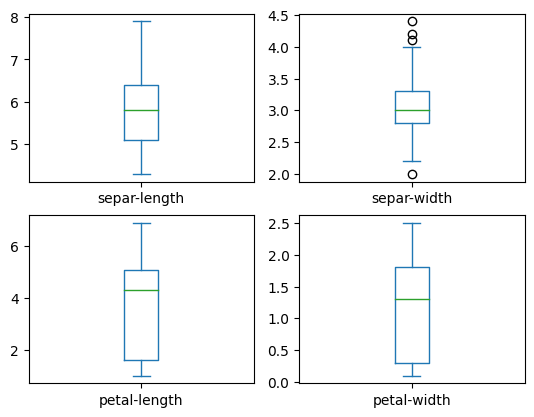

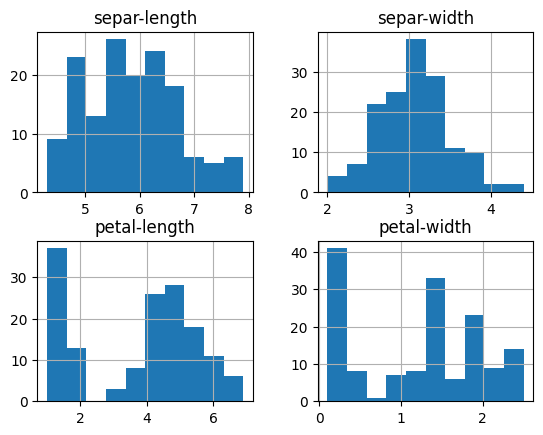

In [55]:
import numpy as np


#箱线图
dataset.iloc[:, 0:4].plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()


#直方图
dataset.iloc[:, 0:4].hist()
plt.show()

从直方图可以看出，separ-length和separ-width基本符合高斯分布。


<font color='red'><b>3.2 多变量图表</b></font>

可以通过散点矩阵图来查看每个属性之间的关系。

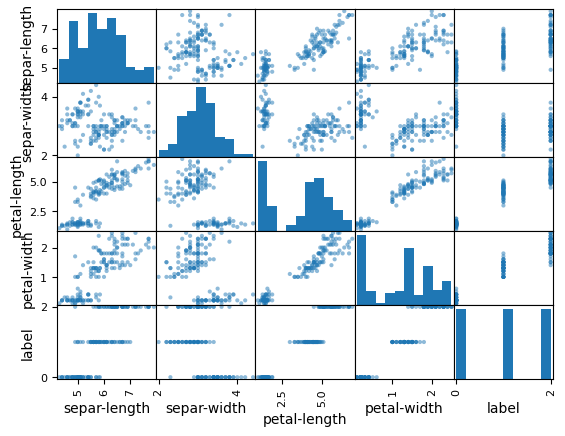

In [56]:
from pandas.plotting import scatter_matrix
#散点矩阵图
scatter_matrix(dataset)
plt.show()

从多变量图大概能看出特征量之间的关系。


<font color='red'><b>4、评估算法</b></font>

将数据集代入各种算法训练，找出最合适的算法。

步骤如下：

（1）分离训练集；

（2）采用10折交叉验证来评估算法模型；

（3）生成6个不同的模型来预测新数据；

（4）选择最优模型。


<font color='red'><b>4.1 分离训练集</b></font>

一般分出数据集的80%作为训练集，剩下的20%用来作为测试集。

In [62]:
#sklearn分类需要的类
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#打分
from sklearn.metrics import accuracy_score

#分出训练集
array=dataset.values
validation_size=0.2
random_seed=7 #随机种子，保证每次随机结果相同/实验ke'chong

In [98]:
print(dataset.head())

   separ-length  separ-width  petal-length  petal-width  label
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


划分训练集和测试集

In [79]:
X = array[:, :4]
Y = array[:, 4]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_seed)
for i in [X_train, X_test, Y_train, Y_test]:
    print(i.shape)

print("X_train"=="X_train")
print("a"=="a")

(120, 4)
(30, 4)
(120,)
(30,)
True
True


In [97]:
print(array)

[[5.1        3.5        1.4        0.2        0.        ]
 [4.9        3.         1.4        0.2        0.        ]
 [4.7        3.2        1.3        0.2        0.        ]
 [4.6        3.1        1.5        0.2        0.        ]
 [5.         3.6        1.4        0.2        0.        ]
 [5.4        3.9        1.7        0.4        0.        ]
 [4.6        3.4        1.4        0.3        0.        ]
 [5.         3.4        1.5        0.2        0.        ]
 [4.4        2.9        1.4        0.2        0.        ]
 [4.9        3.1        1.5        0.1        0.        ]
 [5.4        3.7        1.5        0.2        0.        ]
 [4.8        3.4        1.6        0.2        0.        ]
 [4.8        3.         1.4        0.1        0.        ]
 [4.3        3.         1.1        0.1        0.        ]
 [5.8        4.         1.2        0.2        0.        ]
 [5.7        4.4        1.5        0.4        0.        ]
 [5.4        3.9        1.3        0.4        0.        ]
 [5.1        3

In [96]:
print(X)

[[5.1        3.5        1.4        0.2       ]
 [4.9        3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [4.6        3.1        1.5        0.2       ]
 [5.         3.6        1.4        0.2       ]
 [5.4        3.9        1.7        0.4       ]
 [4.6        3.4        1.4        0.3       ]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.1       ]
 [5.4        3.7        1.5        0.2       ]
 [4.8        3.4        1.6        0.2       ]
 [4.8        3.         1.4        0.1       ]
 [4.3        3.         1.1        0.1       ]
 [5.8        4.         1.2        0.2       ]
 [5.7        4.4        1.5        0.4       ]
 [5.4        3.9        1.3        0.4       ]
 [5.1        3.5        1.4        0.3       ]
 [5.7        3.8        1.7        0.3       ]
 [5.1        3.8        1.5        0.3       ]
 [5.4        3.4        1.7        0.2       ]
 [5.84520548 

鸢尾花总数150个，训练集120个，测试集30个。分离成功。


<font color='red'><b>4.2 评估模型</b></font>

用10折交叉验证来分离训练数据集，评估算法的准确度。10折交叉验证是随机地将数据分成10份：9份用来训练模型，1份用来评估算法。


<font color='red'><b>4.3 创建模型</b></font>

根据散点图可以看出，有些数据符合线性分许，所以可以用线性模型来评估。


In [74]:
#逻辑回归算法
from sklearn.linear_model import LogisticRegression
#交叉验证
from sklearn.model_selection import cross_val_score
#决策树
from sklearn.tree import DecisionTreeClassifier
#K-Means
from sklearn.cluster import KMeans
#贝叶斯
from sklearn.naive_bayes import GaussianNB
#支持向量机SVM
from sklearn.svm import SVC


用以下四种算法构建训练模型，并进行训练：

线性回归（LR）；
决策树（DTree）；
贝叶斯分类器（NB）；
支持向量机（SVM）。
其中，LR为线性算法，剩下的都为非线性算法。

In [80]:
model_svc = SVC()
model_svc.fit(X_train, Y_train)

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, Y_train)


DecisionTreeClassifier()

In [81]:
pre_svc = model_svc.predict(X_test)

交叉验证实现方式

In [83]:
models={}
models['LR']=LogisticRegression()
models['DTree']=DecisionTreeClassifier()

models['NB']=GaussianNB()
models['SVM']=SVC()
seed = 7
#评估算法
results=[]
for key in models:# 可用key下表访问字典
    kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=cross_val_score(models[key],X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)

E:\pycharm\pyinterpreter\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\pycharm\pyinterpreter\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [89]:
##交叉验证
models = {}

models["LR"] = LogisticRegression()
models["SVM"] = SVC()
models["Dtree"] = DecisionTreeClassifier()
models["GaussianNB"] = GaussianNB()

results = []

for key in models:
    kfold = KFold(n_splits=10, random_state=random_seed, shuffle=True)
    cv_results=cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
for i in results:
    print(i)


[1.         1.         1.         0.91666667 0.91666667 1.
 1.         1.         0.91666667 0.91666667]
[0.91666667 1.         1.         0.91666667 0.91666667 1.
 1.         1.         0.91666667 1.        ]
[1.         0.91666667 1.         1.         0.91666667 1.
 1.         1.         0.91666667 0.91666667]
[1.         1.         1.         0.91666667 0.91666667 0.91666667
 1.         0.91666667 0.91666667 0.91666667]


E:\pycharm\pyinterpreter\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\pycharm\pyinterpreter\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

查看交叉验证训练结果

In [86]:
# print(results)
for i in results:
    print(i)
    print()
    

[1.         1.         1.         1.         1.         0.91666667
 1.         0.91666667 0.91666667 1.        ]

[0.91666667 1.         0.91666667 1.         1.         0.91666667
 1.         0.91666667 0.83333333 1.        ]

[0.91666667 1.         0.91666667 1.         1.         0.83333333
 1.         0.91666667 0.91666667 1.        ]

[1.         1.         0.91666667 1.         1.         0.91666667
 1.         0.91666667 0.91666667 1.        ]



In [92]:
print(type(results))
# print(results.info)

<class 'list'>


AttributeError: 'list' object has no attribute 'info'

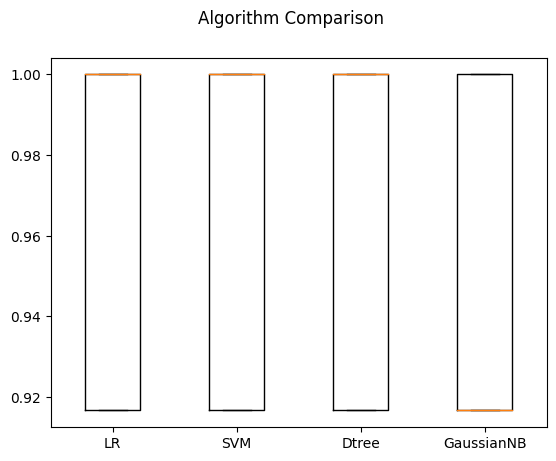

In [93]:
#箱线图比较算法
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(1,1,1) # 分为1*1的第1个子图
plt.boxplot(results)
ax.set_xticklabels(models.keys())  # plt.xticks(range(1, len(models.keys())+1), models.keys())也可
plt.show()


<font color='red'><b>5、模型预测</b></font>

请给出结论，哪个模型的效果最好

print(X_test[:,0],X_test[:,1])

In [95]:
print(X_test[:,0], "\n\n\n", X_test[:,1])

[5.8        5.1        6.6        5.4        7.9        6.3
 6.9        5.1        4.7        6.9        5.6        5.4
 7.1        6.4        6.         4.4        5.8        5.6
 5.4        5.         5.5        5.4        6.7        5.
 7.2        5.7        5.5        5.1        6.1        5.84520548] 


 [4.  2.5 3.  3.9 2.8 3.3 3.1 3.8 3.2 3.2 2.7 3.9 3.  3.2 2.9 3.2 2.6 3.
 3.4 3.5 2.6 3.  3.  3.5 3.2 2.8 4.2 3.8 2.8 3. ]


选择效果最高的两个模型，并绘制分类效果图（图表类型可自行选择）

In [104]:
svm = SVC()
svm.fit(X_train, Y_train)
pre_svm = svm.predict(X_test)
print(pre_svm)
print(accuracy_score(Y_test, pre_svm))

[0. 1. 1. 0. 2. 1. 2. 0. 0. 2. 1. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 2. 0.
 2. 1. 0. 0. 1. 2.]
0.9666666666666667


Text(0.5, 1.0, 'pre_svm')

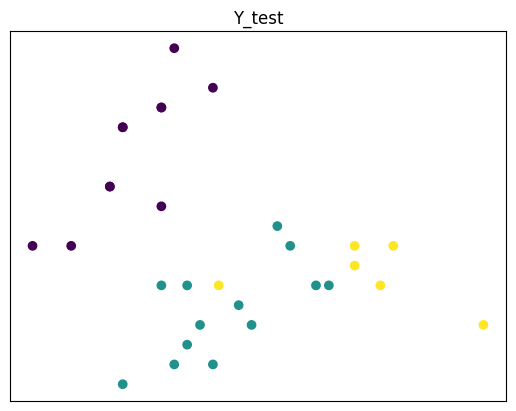

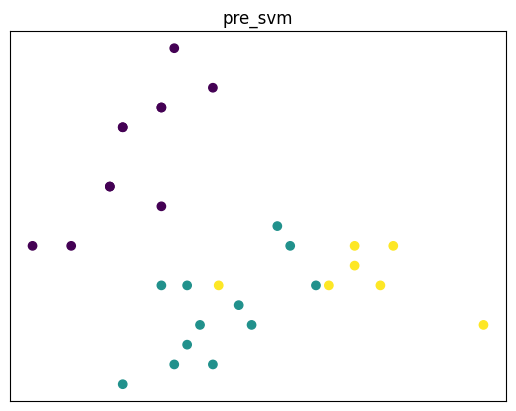

In [110]:

plt.figure(1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test)
plt.xticks(())
plt.yticks(())
plt.title("Y_test")

plt.figure(2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=pre_svm)
plt.xticks(())
plt.yticks(())
plt.title("pre_svm")



In [105]:
print(X_test)

[[5.8        4.         1.2        0.2       ]
 [5.1        2.5        3.         1.1       ]
 [6.6        3.         4.4        1.4       ]
 [5.4        3.9        1.3        0.4       ]
 [7.9        2.8        6.4        2.        ]
 [6.3        3.3        4.7        1.6       ]
 [6.9        3.1        5.1        2.3       ]
 [5.1        3.8        1.9        0.4       ]
 [4.7        3.2        1.6        0.2       ]
 [6.9        3.2        5.7        2.3       ]
 [5.6        2.7        4.2        1.3       ]
 [5.4        3.9        1.7        0.4       ]
 [7.1        3.         5.9        2.1       ]
 [6.4        3.2        4.5        1.5       ]
 [6.         2.9        4.5        1.5       ]
 [4.4        3.2        1.3        0.2       ]
 [5.8        2.6        4.         1.2       ]
 [5.6        3.         4.1        1.5       ]
 [5.4        3.4        1.5        0.4       ]
 [5.         3.5        1.2        0.2       ]
 [5.5        2.6        4.4        1.2       ]
 [5.4        

0.9666666666666667


([], [])

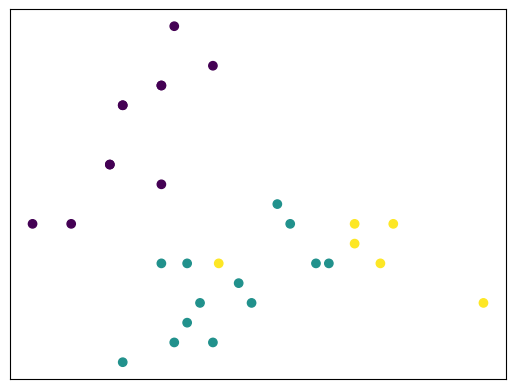

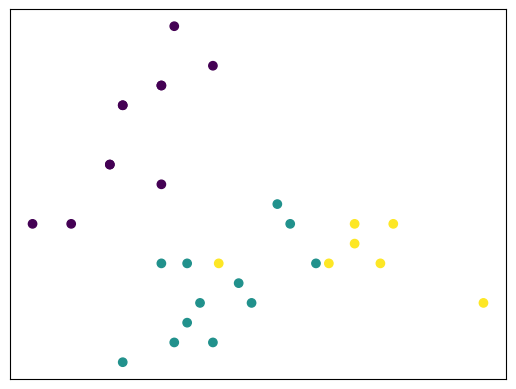

In [108]:
#使用评估数据集评估算法

svm=SVC()
svm.fit(X=X_train,y=Y_train)
pre_svm=svm.predict(X_test)
print(accuracy_score(Y_test,pre_svm))

plt.figure(1)
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)# c会给不同值分配颜色
plt.xticks(())  
plt.yticks(())  # 取消刻度
plt.figure(2)
plt.scatter(X_test[:, 0],X_test[:,1],c=pre_svm)
plt.xticks(())  
plt.yticks(())

0.9666666666666667


([], [])

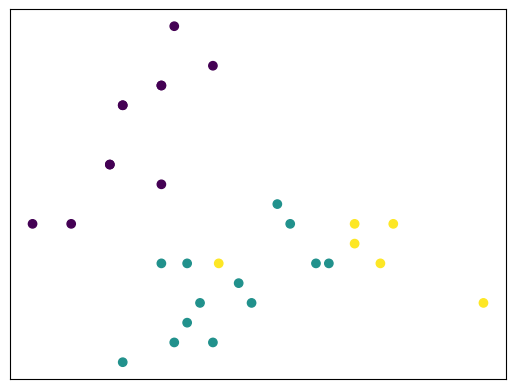

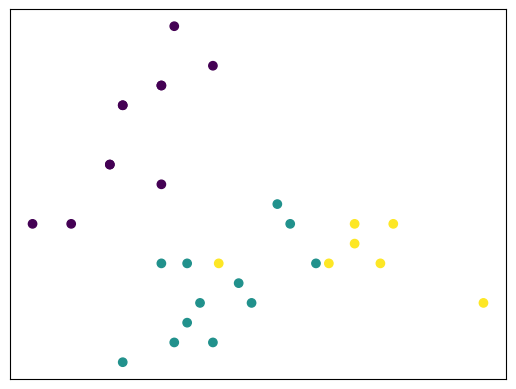

In [111]:
lr=LogisticRegression()
lr.fit(X=X_train,y=Y_train)
pre_lr=lr.predict(X_test)
print(accuracy_score(Y_test,pre_lr))

plt.figure(1)
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)
plt.xticks(())  
plt.yticks(())  #取消刻度
plt.figure(2)
plt.scatter(X_test[:, 0],X_test[:,1],c=pre_lr)
plt.xticks(())  
plt.yticks(())  